# 資料清理(Data Clean)：讀取檔案。

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('./data/healthexp_uncleaned.csv')
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


## 遺失值(Missing Value)處理

In [14]:
df.isna().sum()

Year               0
Country            0
Spending_USD       1
Life_Expectancy    0
dtype: int64

In [15]:
df = df.dropna()
df.isna().sum()

Year               0
Country            0
Spending_USD       0
Life_Expectancy    0
dtype: int64

## 重複記錄處理

In [16]:
df.duplicated(subset=['Year', 'Country']).sum()

1

In [17]:
df = df.drop_duplicates(subset=['Year', 'Country'])
df.duplicated(subset=['Year', 'Country']).sum()

0

## 樞紐分析

In [18]:
df_pivot = df.pivot(columns='Country', index='Year', values=['Life_Expectancy'])
df_pivot

Life_Expectancy                                         
Country          Canada France Germany Great Britain Japan   USA
Year                                                            
1970                NaN   72.2    70.6          71.9  72.0  70.9
1971               72.8    NaN    70.8          71.9  72.9  71.2
1972                NaN    NaN    71.0           NaN  73.2  71.2
1973                NaN    NaN    71.3           NaN  73.4  71.4
1974                NaN    NaN    71.5           NaN  73.7  72.0
1975                NaN   73.0    71.4           NaN  74.3  72.7
1976               73.8    NaN    71.8           NaN  74.8  72.9
1977                NaN    NaN    72.5           NaN  75.3  73.3
1978                NaN    NaN    72.4           NaN  75.7  73.5
1979               75.1    NaN    72.8           NaN  76.2  73.9
1980               75.2   74.3    72.9          73.2  76.1  73.7
1981               75.5    NaN    73.2          73.8  76.5  74.1
1982               75.6    NaN    73.5          74.1  76.9  74.5
1983               75.9    NaN    73.8          74.3  77.0  74.6
1984               76.2    NaN    74.3          74.5  77.4  74.7
1985               76.3   75.4    75.0          74.7  77.6  74.7
1986               76.5    NaN    75.2          74.8  78.1  74.7
1987               76.7    NaN    75.6          75.2  78.5  74.9
1988               76.8    NaN    75.9          75.3  78.4  74.9
1989               77.1    NaN    76.0          75.4  78.8  75.1
1990               77.3   77.0    77.3          75.7  78.9  75.3
1991               77.6   77.2     NaN          75.9  79.1  75.5
1992               77.8   77.5    76.1          76.3  79.2  75.7
1993               77.8   77.5    76.1          76.2  79.4  75.5
1994               77.9   78.0    76.5          76.8  79.8  75.7
1995               78.0   78.1    76.6          76.7  79.6  75.7
1996               78.2   78.2    76.9          76.9  80.3  76.1
1997               78.3   78.6    77.3          77.2  80.5  76.5
1998               78.6   78.8    77.7          77.3  80.6  76.7
1999               78.8   78.9    77.9          77.5  80.5  76.7
2000               79.1   79.2    78.2          77.9  81.2  76.7
2001               79.3   79.3    78.5          78.2  81.5  76.9
2002               79.5   79.4    78.5          78.3  81.8  77.0
2003               79.6   79.3    78.6          78.4  81.8  77.1
2004               79.9   80.3    79.2          79.0  82.1  77.6
2005               80.0   80.4    79.4          79.2  82.0  77.6
2006               80.4   81.0    79.8          79.5  82.4  77.8
2007               80.5   81.2    80.1          79.7  82.6  78.1
2008               80.7   81.4    80.2          79.8  82.7  78.1
2009               80.9   81.5    80.3          80.4  83.0  78.5
2010               81.2   81.8    80.5          80.6  82.9  78.6
2011               81.4   82.3    80.5          81.0  82.7  78.7
2012               81.6   82.1    80.6          81.0  83.2  78.8
2013               81.7   82.3    80.6          81.1  83.4  78.8
2014               81.8   82.8    81.2          81.4  83.7  78.9
2015               81.9   82.4    80.7          81.0  83.9  78.7
2016               82.0   82.7    81.0          81.2  84.1  78.7
2017               81.9   82.7    81.1          81.3  84.2  78.6
2018               82.0   82.8    81.0          81.3  84.3  78.7
2019               82.2   82.9    81.3          81.4  84.4  78.8
2020               81.7   82.3    81.1           NaN  84.7  77.0

## 遺失值(Missing Value)處理

In [19]:
df_pivot.isna().sum()

                 Country      
Life_Expectancy  Canada            7
                 France           16
                 Germany           1
                 Great Britain     9
                 Japan             0
                 USA               0
dtype: int64

In [22]:
df_pivot = df_pivot.fillna(method='ffill', axis=1)
df_pivot.isna().sum()

                 Country      
Life_Expectancy  Canada           7
                 France           5
                 Germany          0
                 Great Britain    0
                 Japan            0
                 USA              0
dtype: int64

In [23]:
df_pivot = df_pivot.fillna(method='bfill', axis=1)
df_pivot.isna().sum()

                 Country      
Life_Expectancy  Canada           0
                 France           0
                 Germany          0
                 Great Britain    0
                 Japan            0
                 USA              0
dtype: int64

In [24]:
df_pivot

Life_Expectancy                                         
Country          Canada France Germany Great Britain Japan   USA
Year                                                            
1970               72.2   72.2    70.6          71.9  72.0  70.9
1971               72.8   72.8    70.8          71.9  72.9  71.2
1972               71.0   71.0    71.0          71.0  73.2  71.2
1973               71.3   71.3    71.3          71.3  73.4  71.4
1974               71.5   71.5    71.5          71.5  73.7  72.0
1975               73.0   73.0    71.4          71.4  74.3  72.7
1976               73.8   73.8    71.8          71.8  74.8  72.9
1977               72.5   72.5    72.5          72.5  75.3  73.3
1978               72.4   72.4    72.4          72.4  75.7  73.5
1979               75.1   75.1    72.8          72.8  76.2  73.9
1980               75.2   74.3    72.9          73.2  76.1  73.7
1981               75.5   75.5    73.2          73.8  76.5  74.1
1982               75.6   75.6    73.5          74.1  76.9  74.5
1983               75.9   75.9    73.8          74.3  77.0  74.6
1984               76.2   76.2    74.3          74.5  77.4  74.7
1985               76.3   75.4    75.0          74.7  77.6  74.7
1986               76.5   76.5    75.2          74.8  78.1  74.7
1987               76.7   76.7    75.6          75.2  78.5  74.9
1988               76.8   76.8    75.9          75.3  78.4  74.9
1989               77.1   77.1    76.0          75.4  78.8  75.1
1990               77.3   77.0    77.3          75.7  78.9  75.3
1991               77.6   77.2    77.2          75.9  79.1  75.5
1992               77.8   77.5    76.1          76.3  79.2  75.7
1993               77.8   77.5    76.1          76.2  79.4  75.5
1994               77.9   78.0    76.5          76.8  79.8  75.7
1995               78.0   78.1    76.6          76.7  79.6  75.7
1996               78.2   78.2    76.9          76.9  80.3  76.1
1997               78.3   78.6    77.3          77.2  80.5  76.5
1998               78.6   78.8    77.7          77.3  80.6  76.7
1999               78.8   78.9    77.9          77.5  80.5  76.7
2000               79.1   79.2    78.2          77.9  81.2  76.7
2001               79.3   79.3    78.5          78.2  81.5  76.9
2002               79.5   79.4    78.5          78.3  81.8  77.0
2003               79.6   79.3    78.6          78.4  81.8  77.1
2004               79.9   80.3    79.2          79.0  82.1  77.6
2005               80.0   80.4    79.4          79.2  82.0  77.6
2006               80.4   81.0    79.8          79.5  82.4  77.8
2007               80.5   81.2    80.1          79.7  82.6  78.1
2008               80.7   81.4    80.2          79.8  82.7  78.1
2009               80.9   81.5    80.3          80.4  83.0  78.5
2010               81.2   81.8    80.5          80.6  82.9  78.6
2011               81.4   82.3    80.5          81.0  82.7  78.7
2012               81.6   82.1    80.6          81.0  83.2  78.8
2013               81.7   82.3    80.6          81.1  83.4  78.8
2014               81.8   82.8    81.2          81.4  83.7  78.9
2015               81.9   82.4    80.7          81.0  83.9  78.7
2016               82.0   82.7    81.0          81.2  84.1  78.7
2017               81.9   82.7    81.1          81.3  84.2  78.6
2018               82.0   82.8    81.0          81.3  84.3  78.7
2019               82.2   82.9    81.3          81.4  84.4  78.8
2020               81.7   82.3    81.1          81.1  84.7  77.0

In [42]:
df_new = df_pivot.stack().reset_index()
df_new 

,Year,Country,Life_Expectancy
0,1970,Canada,72.2
1,1970,France,72.2
2,1970,Germany,70.6
3,1970,Great Britain,71.9
4,1970,Japan,72.0
...,...,...,...
301,2020,France,82.3
302,2020,Germany,81.1
303,2020,Great Britain,81.1
304,2020,Japan,84.7


In [44]:
df_new.isna().sum()

Year               0
Country            0
Life_Expectancy    0
dtype: int64

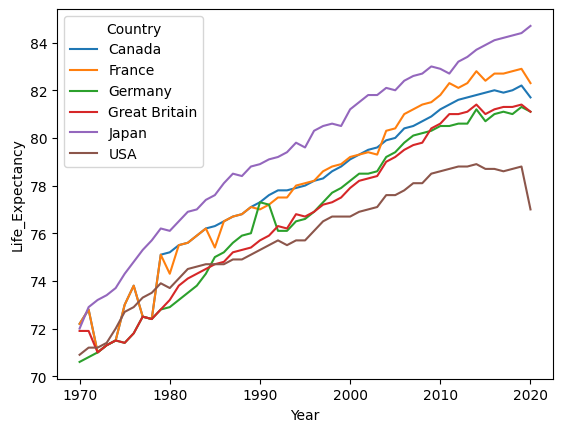

In [43]:
sns.lineplot(data=df_new, x='Year', y='Life_Expectancy', hue='Country');